Importing Libraries

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

Importing Training and Testing Data

In [7]:
train  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_E6oV3lV (1).csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_tweets_anuFYb8 (1).csv')

Preprocessing of Data

In [8]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [10]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [11]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Positive and negative comments are almost equal in numbers. It will be a balance classification.

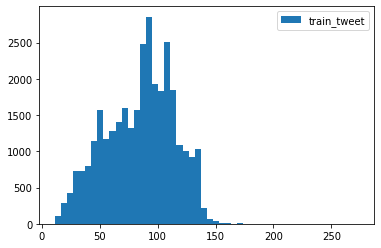

In [12]:
length_train = train['tweet'].str.len()  
plt.hist(length_train, bins=50, label="train_tweet") 
plt.legend() 
plt.show()

Cleaning noise i.e., (punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text

But before that first combine the dataset for convenience

In [13]:
comb = train
comb.shape

(31962, 3)

In [14]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

Removing Punctuations, Numbers, and Special Characters

In [16]:
comb['tidy_tweet'] = np.vectorize(remove_pattern)(comb['tweet'], "@[\w]*") # removing twitter handels if any
comb['tidy_tweet'] = comb['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
comb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


Removing Short Words

Some small words like 'oh', 'hlo', 'it', 'be' etc are of no use in getting sentiments. It's better to get rid of them.

In [17]:
comb['tidy_tweet'] = comb['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
comb.head(10)

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


DATA VISUALIZATION

Common words used

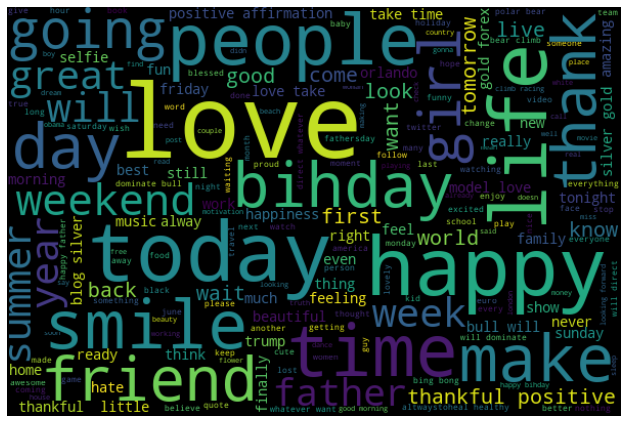

In [18]:
all_words = ' '.join([text for text in comb['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=600, height=400, random_state=101, max_font_size=100).generate(all_words) 
plt.figure(figsize=(11, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most common words in positive tweets

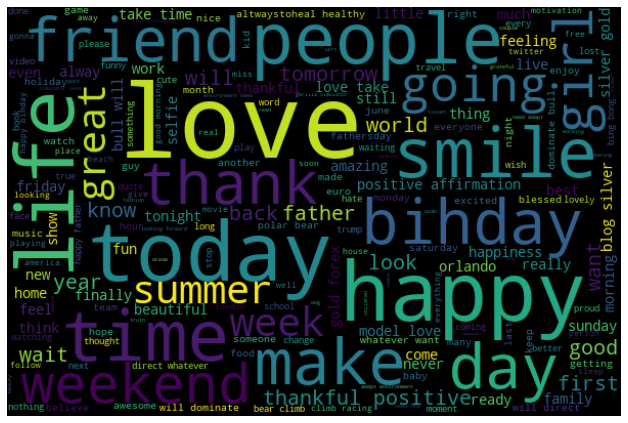

In [19]:
negative_words =' '.join([text for text in comb['tidy_tweet'][comb['label'] == 0]]) 
wordcloud = WordCloud(width=600, height=400, random_state=101, max_font_size=100).generate(negative_words) 
plt.figure(figsize=(11, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Most common words in negative tweets

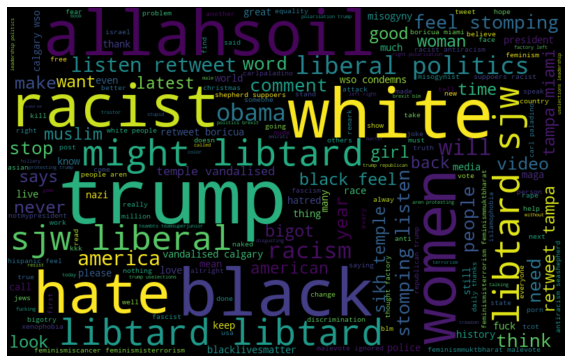

In [20]:
positive_words = ' '.join([text for text in comb['tidy_tweet'][comb['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [21]:
comb.to_csv('/sentiment.csv', encoding='utf-8')

MODEL

In [22]:
embedding_dim = 100
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=31960
test_portion=.1

corpus = []

In [23]:
num_sentences = 0
with open("/sentiment.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[4])
        this_label=row[2]
        if this_label=='0' or this_label<'0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [24]:
print(num_sentences)
print(len(corpus))
print(corpus[2])
print(len(corpus))

31963
31963
['thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked', 0]
31963


In [25]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = np.array(padded[0:split])
training_sequences =np.array(padded[split:training_size])
test_labels = np.array(labels[0:split])
training_labels = np.array(labels[split:training_size])

In [26]:
print(vocab_size)
print(word_index['kill'])

36229
567


In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 30
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           3623000   
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 46, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

Training accuracy is 98.87% and validation accuracy is 95.03% which seems good for this type of highly unstruuctured data.


In [28]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

<Figure size 432x288 with 0 Axes>

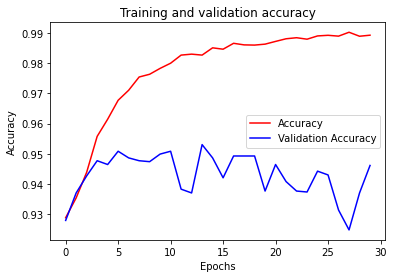

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

In [30]:
test['tidy_tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*") # removing twitter handels if any
test['tidy_tweet'] = test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [31]:
test['tidy_tweet'] = test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [32]:
tokenized_text_x = test['tidy_tweet'].apply(lambda x: x.split())

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_text_x)

word_index = tokenizer.word_index
vocab_size=len(word_index)
sequences_x = tokenizer.texts_to_sequences(tokenized_text_x)
padded = pad_sequences(sequences_x, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [34]:
test_sequences = np.array(padded)
pred=[]

In [35]:
pred_label=model.predict(test_sequences)
for i in range(len(pred_label)):
  if pred_label[i]<0.5:
    pred.append(0)
  else:
    pred.append(1)
print(len(pred))
print(len(pred_label))

17197
17197


In [36]:
test['pred_label']=pred
test.drop('tidy_tweet',axis=1,inplace=True)

In [37]:
test.to_csv('/Predicted_Test_full.csv', encoding='utf-8')

In [38]:
test['pred_label'].value_counts()

0    16754
1      443
Name: pred_label, dtype: int64